In [1]:
import os
os.environ["MUJOCO_GL"] = "egl"
from IPython import display

import time
import gymnasium as gym
import numpy as np
import mediapy as media
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import random
import pybullet_envs_gymnasium as envs

from stable_baselines3 import SAC # if this doesnt work, uninstall reinstall torch
from stable_baselines3.common.env_util import make_vec_env

np.set_printoptions(precision=3, suppress=True, linewidth=100)

In [2]:
env_name = "Walker2DBulletEnv-v0"
env = gym.make(env_name, render_mode='rgb_array')

pybullet build time: May 12 2025 02:32:36


In [ ]:
model = SAC(
    "MlpPolicy",
    env,
    tensorboard_log="./sac_logs/",
)

model.learn(total_timesteps=300_000, progress_bar=True)
model.save("300k_steps_run")
print("finished training and saved run")

Output()

argv[0]=
argv[0]=


/home/ronan/miniforge3/envs/exoskeleton/lib/python3.13/site-packages/stable_baselines3/sac/sac.py:233: UserWarning:
Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at 
/home/ronan/Documents/github/pytorch/aten/src/ATen/native/Scalar.cpp:22.)
  ent_coef_losses.append(ent_coef_loss.item())

finished training and saved run


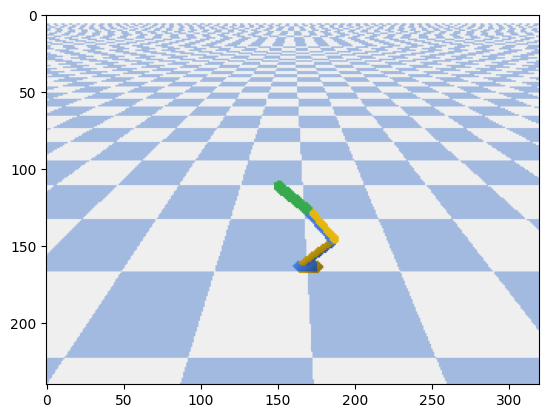

In [5]:
obs, info = env.reset()
img = plt.imshow(env.render())
for _ in range(100):
    img.set_data(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)

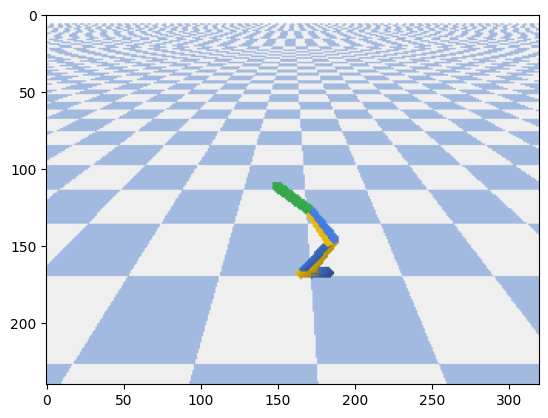

In [9]:
model = SAC.load("./100k_steps_run.zip", env=env)

obs, info = env.reset()
img = plt.imshow(env.render())
for _ in range(100):
    img.set_data(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)

In [12]:
print(dir(model))
print(model.tensorboard_log)
print(model.logger)

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_convert_train_freq', '_create_aliases', '_current_progress_remaining', '_custom_logger', '_dump_logs', '_episode_num', '_episode_storage', '_excluded_save_params', '_get_policy_from_name', '_get_torch_save_params', '_init_callback', '_last_episode_starts', '_last_obs', '_last_original_obs', '_logger', '_n_updates', '_num_timesteps_at_start', '_on_step', '_sample_action', '_setup_learn', '_setup_lr_schedule', '_setup_model', '_stats_window_size', '_store_transition', '_total_timesteps', '_update_current_progress_remainin